In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd My Drive
%cd dssm_lstm

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
/gdrive/My Drive
/gdrive/My Drive/dssm_lstm


In [0]:
data = pd.read_csv('words_dataset.csv')
print(data)

data = data[0:798]
print(data)

       id        word  label         0  ...       296       297       298       299
0     1.0      people    0.0  0.263672  ...  0.021118 -0.066895  0.207031 -0.138672
1     2.0  adaptation    0.0  0.261719  ... -0.143555  0.102539 -0.006042  0.289062
2     3.0       tribe    0.0 -0.082031  ... -0.086914 -0.172852  0.180664  0.009888
3     4.0   community    0.0 -0.171875  ... -0.088379 -0.153320  0.155273 -0.150391
4     5.0       child    0.0  0.165039  ... -0.045166 -0.006622 -0.154297  0.075684
...   ...         ...    ...       ...  ...       ...       ...       ...       ...
1033  NaN         NaN    NaN       NaN  ...       NaN       NaN       NaN       NaN
1034  NaN         NaN    NaN       NaN  ...       NaN       NaN       NaN       NaN
1035  NaN         NaN    NaN       NaN  ...       NaN       NaN       NaN       NaN
1036  NaN         NaN    NaN       NaN  ...       NaN       NaN       NaN       NaN
1037  NaN         NaN    NaN       NaN  ...       NaN       NaN       NaN   

In [0]:
data_labels = data['label']
data_words = data['word']
data_id = data['id']
data_embed  = data.drop(labels = ['word','label','id'],axis=1)

print(data_words)
print(data_labels)
print(data_embed)
print(data_id)

0          people
1      adaptation
2           tribe
3       community
4           child
          ...    
793     serveware
794     tableware
795           cup
796     porcelain
797       granita
Name: word, Length: 798, dtype: object
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
793    9.0
794    9.0
795    9.0
796    9.0
797    9.0
Name: label, Length: 798, dtype: float64
            0         1         2  ...       297       298       299
0    0.263672 -0.019165  0.028931  ... -0.066895  0.207031 -0.138672
1    0.261719 -0.080566 -0.208008  ...  0.102539 -0.006042  0.289062
2   -0.082031 -0.159180  0.051270  ... -0.172852  0.180664  0.009888
3   -0.171875 -0.047119  0.016846  ... -0.153320  0.155273 -0.150391
4    0.165039 -0.063965 -0.001785  ... -0.006622 -0.154297  0.075684
..        ...       ...       ...  ...       ...       ...       ...
793 -0.206055 -0.021729 -0.048584  ... -0.151367  0.233398  0.085938
794 -0.218750  0.029053 -0.048096  ... -0.044189 

0.0    190
9.0    172
2.0    122
1.0    108
8.0     68
6.0     47
3.0     31
4.0     25
5.0     18
7.0     17
Name: label, dtype: int64

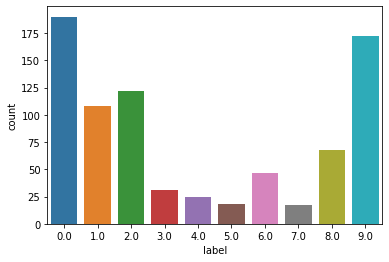

In [0]:
g = sns.countplot(data_labels)

data_labels.value_counts()

In [0]:
from keras.utils.np_utils import to_categorical
 

train_labels = to_categorical(data_labels, num_classes = 10)

Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split

random_seed = 1
X_train, X_val, Y_train, Y_val = train_test_split(data_id, train_labels, test_size = 0.2, random_state=random_seed)

In [0]:
df = pd.DataFrame(data.drop(labels = ['word','label','id'],axis=1))
print(df)

            0         1         2  ...       297       298       299
0    0.263672 -0.019165  0.028931  ... -0.066895  0.207031 -0.138672
1    0.261719 -0.080566 -0.208008  ...  0.102539 -0.006042  0.289062
2   -0.082031 -0.159180  0.051270  ... -0.172852  0.180664  0.009888
3   -0.171875 -0.047119  0.016846  ... -0.153320  0.155273 -0.150391
4    0.165039 -0.063965 -0.001785  ... -0.006622 -0.154297  0.075684
..        ...       ...       ...  ...       ...       ...       ...
793 -0.206055 -0.021729 -0.048584  ... -0.151367  0.233398  0.085938
794 -0.218750  0.029053 -0.048096  ... -0.044189  0.378906  0.025391
795 -0.292969 -0.078125  0.023071  ... -0.184570 -0.038330  0.291016
796 -0.176758  0.259766 -0.107422  ...  0.310547  0.298828 -0.121582
797 -0.129883 -0.201172  0.318359  ... -0.030029  0.201172  0.048828

[798 rows x 300 columns]


In [0]:
my_dict = data_words.to_dict()
print(my_dict)

dictt = dict()
for i in my_dict:
  dictt[i+1] = my_dict[i]

print(dictt)

{0: 'people', 1: 'adaptation', 2: 'tribe', 3: 'community', 4: 'child', 5: 'smile', 6: 'temple', 7: nan, 8: 'hair', 9: 'forehead', 10: 'hairstyle', 11: 'human', 12: 'black', 13: 'neck', 14: 'youth', 15: 'rural', 16: 'area', 17: 'plant', 18: 'play', 19: 'village', 20: 'school', 21: 'male', 22: 'leg', 23: 'body', 24: 'muscle', 25: 'barechested', 26: 'chest', 27: 'flesh', 28: 'shack', 29: 'hut', 30: 'jungle', 31: 'nature', 32: 'reserve', 33: 'tree', 34: 'rainforest', 35: 'house', 36: 'building', 37: 'event', 38: 'folk', 39: 'dance', 40: 'ritual', 41: 'festival', 42: 'crowd', 43: 'soil', 44: 'tradition', 45: 'moustache', 46: 'facial', 47: 'photography', 48: 'beard', 49: 'tribal', 50: 'chief', 51: 'cuirass', 52: 'viking', 53: 'fictional', 54: 'character', 55: 'art', 56: 'headgear', 57: 'glasses', 58: 'ceremony', 59: 'product', 60: 'fan', 61: 'carnival', 62: 'public', 63: 'fun', 64: 'bunker', 65: 'fortification', 66: 'air', 67: 'raid', 68: 'shelter', 69: 'grass', 70: 'historic', 71: 'site', 7

In [0]:
dict2 = dict()
cnt=0
for i, j in df.iterrows(): 
    dict2[cnt] = np.array(j)
    cnt = cnt + 1
print(len(dict2))



798


In [0]:
dictt2 = dict()
for i in my_dict:
  dictt2[my_dict[i]] = dict2[i]

In [0]:
dictt3 = dict()
for i in my_dict:
  dictt3[my_dict[i]] = i+1

print(dictt3)

{'people': 1, 'adaptation': 2, 'tribe': 3, 'community': 4, 'child': 5, 'smile': 6, 'temple': 7, nan: 8, 'hair': 9, 'forehead': 10, 'hairstyle': 11, 'human': 12, 'black': 13, 'neck': 14, 'youth': 15, 'rural': 16, 'area': 17, 'plant': 18, 'play': 19, 'village': 20, 'school': 21, 'male': 22, 'leg': 23, 'body': 24, 'muscle': 25, 'barechested': 26, 'chest': 27, 'flesh': 28, 'shack': 29, 'hut': 30, 'jungle': 31, 'nature': 32, 'reserve': 33, 'tree': 34, 'rainforest': 35, 'house': 36, 'building': 37, 'event': 38, 'folk': 39, 'dance': 40, 'ritual': 41, 'festival': 42, 'crowd': 43, 'soil': 44, 'tradition': 45, 'moustache': 46, 'facial': 47, 'photography': 48, 'beard': 49, 'tribal': 50, 'chief': 51, 'cuirass': 52, 'viking': 53, 'fictional': 54, 'character': 55, 'art': 56, 'headgear': 57, 'glasses': 58, 'ceremony': 59, 'product': 60, 'fan': 61, 'carnival': 62, 'public': 63, 'fun': 64, 'bunker': 65, 'fortification': 66, 'air': 67, 'raid': 68, 'shelter': 69, 'grass': 70, 'historic': 71, 'site': 72, 

In [0]:
index_dict = dictt3
word_vectors = dictt2

In [0]:
word_vectors['people']

array([3.6482399 , 4.4382367 , 1.4614449 , 1.8935888 , 3.372981  ,
       0.        , 0.        , 1.2519946 , 1.6780653 , 2.0709436 ,
       2.8941    , 2.4562573 , 2.0711174 , 1.4582651 , 0.50778824,
       0.        , 2.455556  , 0.        , 0.        , 0.        ,
       2.1798937 , 1.5595797 , 0.4200663 , 0.        , 0.        ,
       2.6444278 , 2.4961493 , 3.1698031 , 0.00480286, 1.0385416 ,
       1.4417912 , 0.        , 2.0733082 , 0.        , 2.4870727 ,
       3.3898165 , 0.        , 1.2695943 , 0.        , 3.0180905 ,
       0.5569706 , 1.6304418 , 0.        , 2.499549  , 1.3330939 ,
       0.        , 2.0126047 , 2.3206682 , 0.1429405 , 0.        ,
       0.02906923, 0.        , 3.2440875 , 0.        , 1.0690024 ,
       0.        , 1.8003073 , 1.4429085 , 1.7063149 , 0.        ,
       1.9699886 , 1.6797872 , 0.        , 2.090689  ], dtype=float32)

In [0]:
from keras.layers import Embedding
# assemble the embedding_weights in one numpy array
vocab_dim = 300 # dimensionality of your word vectors
n_symbols = len(index_dict) + 1 # adding 1 to account for 0th index (for masking)
embedding_weights = np.zeros((n_symbols, vocab_dim))
for word,index in index_dict.items():
    embedding_weights[index, :] = word_vectors[word]

# define inputs here
embedding_layer = Embedding(output_dim=vocab_dim, input_dim=n_symbols, trainable=True)
embedding_layer.build((None,)) # if you don't do this, the next step won't work
embedding_layer.set_weights([embedding_weights])


#embedded = embedding_layer(input_layer)
# ... continue model definition here

In [0]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, Input
from keras.models import Model

sequence_input = Input(shape=(1,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Bidirectional(LSTM(64,  return_sequences=True))(embedded_sequences)
x = Bidirectional(LSTM(32))(x)
x = Dense(64, activation='relu')(x)
preds = Dense(10, activation='softmax')(x)

model = Model(sequence_input, preds)

'''model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,), dtype='int32'),
    tf.keras.layers.Embedding(output_dim=vocab_dim, input_dim=n_symbols,trainable=True,mask_zero=True,weights=[embedding_weights]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])'''

"model = tf.keras.Sequential([\n    tf.keras.layers.Input(shape=(1,), dtype='int32'),\n    tf.keras.layers.Embedding(output_dim=vocab_dim, input_dim=n_symbols,trainable=True,mask_zero=True,weights=[embedding_weights]),\n    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),\n    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),\n    tf.keras.layers.Dense(64, activation='relu'),\n    tf.keras.layers.Dropout(0.5),\n    tf.keras.layers.Dense(10, activation='softmax')\n])"

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1, 300)            239700    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1, 128)            186880    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 472,606
Trainable params: 472,606
Non-trainable params: 0
_____________________________________________________

In [0]:
'''model.get_layer('embedding_12').build((None,)) # if you don't do this, the next step won't work
model.get_layer('embedding_12').set_weights([embedding_weights])'''

"model.get_layer('embedding_12').build((None,)) # if you don't do this, the next step won't work\nmodel.get_layer('embedding_12').set_weights([embedding_weights])"

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [0]:
history = model.fit(x = X_train,y = Y_train, epochs=20, validation_data=(X_val,Y_val), validation_steps=10,steps_per_epoch = 10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 638 samples, validate on 160 samples
Epoch 1/20
10/10 [==============================] - 4s 364ms/step - loss: 2.2789 - acc: 0.3133 - val_loss: 2.2498 - val_acc: 0.3250
Epoch 2/20
10/10 [==============================] - 0s 28ms/step - loss: 2.1650 - acc: 0.4011 - val_loss: 2.1114 - val_acc: 0.3125
Epoch 3/20
10/10 [==============================] - 0s 29ms/step - loss: 1.8772 - acc: 0.4277 - val_loss: 1.8855 - val_acc: 0.3750
Epoch 4/20
10/10 [==============================] - 0s 28ms/step - loss: 1.4130 - acc: 0.6157 - val_loss: 1.7175 - val_acc: 0.4313
Epoch 5/20
10/10 [==============================] - 0s 29ms/step - loss: 0.8861 - acc: 0.7826 - val_loss: 1.6816 - val_acc: 0.4250
Epoch 6/20
10/10 [==============================] - 0s 28ms/step - loss: 0.5016 - acc: 0.8649 - val_loss: 1.7592 - val_acc: 0.4688
Epoch 7/20
10/10 [==============================] - 0s 31ms/step - loss

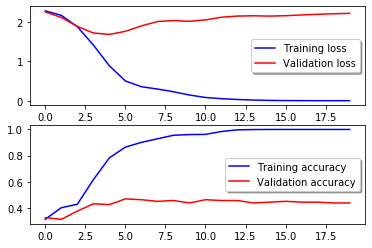

In [0]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label='Training loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation loss', axes = ax[0])
legend = ax[0].legend(loc='best', shadow='true')

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

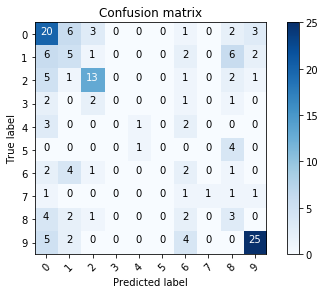

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vector
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [0]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

In [0]:
print(df)

           0         1         2   ...        61        62        63
0    3.648240  4.438237  1.461445  ...  1.679787  0.000000  2.090689
1    3.773253  4.572477  1.482102  ...  1.688485  0.000000  2.150886
2    3.813843  4.642452  1.565818  ...  1.560195  0.000000  2.010796
3    1.904953  2.039301  0.517850  ...  0.476005  0.182957  0.564016
4    3.795802  4.574612  1.516375  ...  1.656245  0.000000  2.079428
..        ...       ...       ...  ...       ...       ...       ...
793  0.059499  1.292610  2.326517  ...  2.773564  0.000000  2.954467
794  0.222886  1.615470  2.450756  ...  2.833848  0.000000  3.039798
795  0.227183  1.500683  2.370053  ...  2.801219  0.000000  3.007406
796  0.503669  2.020678  2.491696  ...  2.805135  0.000000  3.059774
797  0.187329  1.331488  2.543434  ...  2.915573  0.000000  3.348214

[798 rows x 64 columns]


In [0]:
from sklearn.metrics.pairwise import cosine_similarity



cnt = 0 
for i in word_vectors:
  dict_words = dict()
  t = []
  a = word_vectors[i].reshape(1,64)
  print(cnt)
  for j in word_vectors:
    b = word_vectors[j].reshape(1,64)
    cos_lib = cosine_similarity(a, b)
    if len(t) < 10:
      dict_words[j] = cos_lib[0][0]
      t.append(j)
    else:
      minimum = min(dict_words.keys(), key=(lambda k: dict_words[k]))
      if cos_lib[0][0] > dict_words[minimum]:
        t.remove(minimum)
        del dict_words[minimum]
        dict_words[j] = cos_lib[0][0]
        t.append(j)
  if cnt == 0: 
    similar = pd.DataFrame(t)
    similar = similar.transpose()
  else:
    similar2 = pd.DataFrame(t)
    similar2 = similar2.transpose()
    similar = similar.append(similar2, ignore_index=True)
  cnt = cnt + 1
  




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
similar = similar.transpose()
print(similar)
similar.to_csv('synonyms.csv')

          0            1            2    ...        795        796          797
0      people   adaptation        tribe  ...       dish      boeuf       buffet
1  adaptation        child         neck  ...       meat      goods       cheese
2       child  barechested         male  ...      plate       side     stemware
3       human        crowd       jungle  ...  distilled     supper  okonomiyaki
4        play       viking   rainforest  ...        pan       rack     omelette
5       crowd         skin     organism  ...     skewer    comfort        steak
6   massively     werewolf       forest  ...     caesar     oeuvre      sirloin
7     playing       online          hay  ...   dishware   dishware     souvlaki
8        calm      playing  agriculture  ...  tableware  tableware     yakitori
9       party    pitchfork       farmer  ...        cup  porcelain      granita

[10 rows x 798 columns]


In [0]:
print(similar)

          0            1            2    ...        795        796          797
0      people   adaptation        tribe  ...       dish      boeuf       buffet
1  adaptation        child         neck  ...       meat      goods       cheese
2       child  barechested         male  ...      plate       side     stemware
3       human        crowd       jungle  ...  distilled     supper  okonomiyaki
4        play       viking   rainforest  ...        pan       rack     omelette
5       crowd         skin     organism  ...     skewer    comfort        steak
6   massively     werewolf       forest  ...     caesar     oeuvre      sirloin
7     playing       online          hay  ...   dishware   dishware     souvlaki
8        calm      playing  agriculture  ...  tableware  tableware     yakitori
9       party    pitchfork       farmer  ...        cup  porcelain      granita

[10 rows x 798 columns]


In [0]:
labels = pd.read_csv('1.labels.csv',encoding='iso-8859-1')
labels = labels.drop(['ID','score1','score2','score3','score4','score5','score6','score7','score8','score9','score10'],axis=1)
labels.columns=['0','1','2','3','4','5','6','7','8','9']
print(labels)

            0           1           2  ...               7            8          9
0      People  Adaptation       Tribe  ...             NaN          NaN        NaN
1        Hair      People    Forehead  ...      Adaptation       Temple       Neck
2      People   Community  Adaptation  ...            Play      Village     School
3        Male         Leg  Human body  ...             NaN          NaN        NaN
4       Shack         Hut      Jungle  ...      Rural area        House   Building
..        ...         ...         ...  ...             ...          ...        ...
995      Food      Sorbet        Dish  ...  Frozen dessert     Beetroot        NaN
996  Dishware       Plate      Saucer  ...             Cup    Porcelain    Platter
997      Food     Cuisine        Dish  ...          Sorbet    Ice cream     Recipe
998      Meal        Food  Still life  ...          Brunch  Finger food  Serveware
999      Food        Dish     Cuisine  ...             NaN          NaN        NaN

[10

In [0]:
inv_map = {v: k for k, v in index_dict.items()}
print(inv_map)

{1: 'people', 2: 'adaptation', 3: 'tribe', 4: 'community', 5: 'child', 6: 'smile', 7: 'temple', 8: nan, 9: 'hair', 10: 'forehead', 11: 'hairstyle', 12: 'human', 13: 'black', 14: 'neck', 15: 'youth', 16: 'rural', 17: 'area', 18: 'plant', 19: 'play', 20: 'village', 21: 'school', 22: 'male', 23: 'leg', 24: 'body', 25: 'muscle', 26: 'barechested', 27: 'chest', 28: 'flesh', 29: 'shack', 30: 'hut', 31: 'jungle', 32: 'nature', 33: 'reserve', 34: 'tree', 35: 'rainforest', 36: 'house', 37: 'building', 38: 'event', 39: 'folk', 40: 'dance', 41: 'ritual', 42: 'festival', 43: 'crowd', 44: 'soil', 45: 'tradition', 46: 'moustache', 47: 'facial', 48: 'photography', 49: 'beard', 50: 'tribal', 51: 'chief', 52: 'cuirass', 53: 'viking', 54: 'fictional', 55: 'character', 56: 'art', 57: 'headgear', 58: 'glasses', 59: 'ceremony', 60: 'product', 61: 'fan', 62: 'carnival', 63: 'public', 64: 'fun', 65: 'bunker', 66: 'fortification', 67: 'air', 68: 'raid', 69: 'shelter', 70: 'grass', 71: 'historic', 72: 'site', 

In [0]:
similar = similar.transpose()

In [0]:
cnt = 0

for row_index,row in labels.iterrows():
  print(cnt)
  o = [] 
  for i in row:
    for row_indexx,rowx in similar.iterrows():
      if str(inv_map[row_indexx+1]) == str(i).lower():
        for j in rowx:
          o.append(j)
  if cnt == 0: 
    synonyms = pd.DataFrame(o)
    synonyms = synonyms.transpose()
  else:
    synonyms2 = pd.DataFrame(o)
    synonyms2 = synonyms2.transpose()
    synonyms = synonyms.append(synonyms2, ignore_index=True)
  cnt = cnt + 1
  

print(synonyms)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
synonyms.to_csv('synonymsx.csv')

In [0]:
synonyms = synonyms.transpose()

In [0]:
for i in synonyms.columns:
  synonyms[i] = synonyms[i].map(index_dict)

print(synonyms)

    0    1    2    3    4    5    6    ...  993  994  995  996  997  998  999
0     1    9    1    8   27    1    1  ...  633  158   85  633   85  641   85
1     2   35    2   14   29    2    2  ...  641  636   86  649   86  666   86
2     5   70    5   22   30    5    5  ...  649  652  671  658  671  706  671
3    12  100   12   23   41   12   12  ...  705  658  688  683  688  711  688
4    19  165   19   31   54   19   19  ...  706  673  735  710  735  720  735
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
95  107    8    8    8    8    8    8  ...    8    8    8  712    8    8  107
96  110    8    8    8    8    8    8  ...    8    8    8  720    8    8  110
97  168    8    8    8    8    8    8  ...    8    8    8  730    8    8  168
98  179    8    8    8    8    8    8  ...    8    8    8  741    8    8  179
99  185    8    8    8    8    8    8  ...    8    8    8  759    8    8  185

[100 rows x 1000 columns]


In [0]:
synonyms = synonyms.transpose()
cnt = 0
for row_index,row in synonyms.iterrows():
  o = [] 
  for i in row:
    if i != 8 and i not in o:
      o.append(i)
  o.sort()
  print(o)
  if cnt == 0: 
    synonyms2 = pd.DataFrame(o)
    synonyms2 = synonyms2.transpose()
  else:
    synonyms3 = pd.DataFrame(o)
    synonyms3 = synonyms3.transpose()
    synonyms2 = synonyms2.append(synonyms3, ignore_index=True)
  cnt = cnt + 1
  
print(synonyms2)

[1, 2, 3, 4, 5, 6, 7, 12, 14, 19, 22, 23, 24, 26, 31, 33, 35, 43, 53, 61, 64, 80, 81, 83, 91, 97, 103, 107, 108, 110, 111, 112, 114, 115, 126, 135, 138, 139, 140, 142, 149, 150, 153, 168, 175, 179, 181, 185, 188, 189, 203, 318, 327, 335, 345, 351, 358, 378, 384, 404]
[1, 2, 5, 6, 7, 9, 10, 11, 12, 14, 19, 22, 26, 27, 31, 33, 35, 40, 41, 43, 53, 55, 64, 70, 79, 80, 87, 92, 95, 97, 99, 100, 110, 114, 115, 138, 139, 140, 142, 150, 153, 165, 168, 169, 170, 175, 181, 184, 189, 190, 191, 192, 198, 200, 202, 205, 318, 327, 335, 345, 351, 358, 378, 384, 404, 523]
[1, 2, 4, 5, 6, 12, 15, 18, 19, 20, 21, 23, 24, 26, 41, 43, 45, 53, 55, 56, 61, 64, 69, 77, 78, 79, 80, 89, 91, 95, 97, 102, 107, 112, 114, 123, 126, 128, 135, 136, 137, 138, 140, 142, 143, 148, 149, 150, 173, 175, 180, 181, 182, 183, 184, 188, 189, 194, 203, 246, 310, 389, 430, 503, 505, 506, 509, 515, 516, 527, 539, 543]
[1, 2, 5, 10, 12, 13, 14, 15, 22, 23, 25, 26, 27, 28, 31, 33, 39, 41, 44, 47, 53, 54, 55, 64, 68, 79, 81, 88, 93,

In [0]:
synonyms2.to_csv('synonymsxx.csv')

In [0]:
print(synonyms2)

     0   1    2    3    4    5    6    7   ...  81  82  83  84  85  86  87  88
0     1   2    3    4    5    6    7   12  ... NaN NaN NaN NaN NaN NaN NaN NaN
1     1   2    5    6    7    9   10   11  ... NaN NaN NaN NaN NaN NaN NaN NaN
2     1   2    4    5    6   12   15   18  ... NaN NaN NaN NaN NaN NaN NaN NaN
3     1   2    5   10   12   13   14   15  ... NaN NaN NaN NaN NaN NaN NaN NaN
4     2   3    5   15   21   26   27   29  ... NaN NaN NaN NaN NaN NaN NaN NaN
..   ..  ..  ...  ...  ...  ...  ...  ...  ...  ..  ..  ..  ..  ..  ..  ..  ..
995  22  31   33   58   81   85   86  107  ... NaN NaN NaN NaN NaN NaN NaN NaN
996  85  86  156  158  633  634  635  641  ... NaN NaN NaN NaN NaN NaN NaN NaN
997  85  86  156  633  635  637  639  641  ... NaN NaN NaN NaN NaN NaN NaN NaN
998  85  86  156  158  633  635  641  642  ... NaN NaN NaN NaN NaN NaN NaN NaN
999  22  31   33   58   81   85   86  107  ... NaN NaN NaN NaN NaN NaN NaN NaN

[1000 rows x 89 columns]


In [0]:
cnt = 0
for row_index,row in synonyms2.iterrows():
  p = []
  q= []
  for i in row:
    p.append(i)
  for row_index,row in synonyms2.iterrows():
    e = []
    for j in row:
      e.append(j)
    p = [incom for incom in p if str(incom) != 'nan']
    e = [incom for incom in e if str(incom) != 'nan']
    a = len(set(p)&set(e))
    a = a/len(set(p))
    q.append(a)
  print(cnt)
  if cnt == 0: 
    synonyms4 = pd.DataFrame(q)
    synonyms4 = synonyms4.transpose()
  else:
    synonyms5 = pd.DataFrame(q)
    synonyms5 = synonyms5.transpose()
    synonyms4 = synonyms4.append(synonyms5, ignore_index=True)
  cnt = cnt + 1
  

print(synonyms4)  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
synonyms4 = synonyms4*100
print(synonyms4)

            0           1           2    ...         997         998         999
0    100.000000   66.666667   53.333333  ...    0.000000    0.000000   15.000000
1     60.606061  100.000000   37.878788  ...    0.000000    0.000000    9.090909
2     44.444444   34.722222  100.000000  ...    0.000000    0.000000    1.388889
3     47.169811   54.716981   41.509434  ...    0.000000    0.000000   16.981132
4     31.818182   34.848485   33.333333  ...    0.000000    0.000000    6.060606
..          ...         ...         ...  ...         ...         ...         ...
995   11.538462    7.692308    1.282051  ...   69.230769   44.871795   83.333333
996    0.000000    0.000000    0.000000  ...   56.000000   86.000000   56.000000
997    0.000000    0.000000    0.000000  ...  100.000000   52.941176   76.470588
998    0.000000    0.000000    0.000000  ...   64.285714  100.000000   51.785714
999   12.676056    8.450704    1.408451  ...   73.239437   40.845070  100.000000

[1000 rows x 1000 columns]


In [0]:
synonyms4.to_csv('synonyms_corr.csv')

In [0]:
#For feauture vector

intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer('dense_1').output)
intermediate_output = intermediate_layer_model.predict(data_id)

import pandas as pd
print(intermediate_output.shape)
df  = pd.DataFrame(intermediate_output)
print(df)
df.to_csv('CNN.csv')

(798, 64)
           0         1         2   ...        61        62        63
0    3.648240  4.438237  1.461445  ...  1.679787  0.000000  2.090689
1    3.773253  4.572477  1.482102  ...  1.688485  0.000000  2.150886
2    3.813843  4.642452  1.565818  ...  1.560195  0.000000  2.010796
3    1.904953  2.039301  0.517850  ...  0.476005  0.182957  0.564016
4    3.795802  4.574612  1.516375  ...  1.656245  0.000000  2.079428
..        ...       ...       ...  ...       ...       ...       ...
793  0.059499  1.292610  2.326517  ...  2.773564  0.000000  2.954467
794  0.222886  1.615470  2.450756  ...  2.833848  0.000000  3.039798
795  0.227183  1.500683  2.370053  ...  2.801219  0.000000  3.007406
796  0.503669  2.020678  2.491696  ...  2.805135  0.000000  3.059774
797  0.187329  1.331488  2.543434  ...  2.915573  0.000000  3.348214

[798 rows x 64 columns]
